In [2]:
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow as tf
import tf_keras as keras
import os



In [3]:
for dirpath, dirnames, filenames in os.walk(r'C:\Users\ainao\Downloads\Animal Image Classification\raw-img'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 10 directories and 0 images in 'C:\Users\ainao\Downloads\Animal Image Classification\raw-img'.
There are 0 directories and 4863 images in 'C:\Users\ainao\Downloads\Animal Image Classification\raw-img\cane'.
There are 0 directories and 2623 images in 'C:\Users\ainao\Downloads\Animal Image Classification\raw-img\cavallo'.
There are 0 directories and 1446 images in 'C:\Users\ainao\Downloads\Animal Image Classification\raw-img\elefante'.
There are 0 directories and 2112 images in 'C:\Users\ainao\Downloads\Animal Image Classification\raw-img\farfalla'.
There are 0 directories and 3098 images in 'C:\Users\ainao\Downloads\Animal Image Classification\raw-img\gallina'.
There are 0 directories and 1668 images in 'C:\Users\ainao\Downloads\Animal Image Classification\raw-img\gatto'.
There are 0 directories and 1866 images in 'C:\Users\ainao\Downloads\Animal Image Classification\raw-img\mucca'.
There are 0 directories and 1820 images in 'C:\Users\ainao\Downloads\Animal Image Classificatio

In [4]:
data_dir = r'C:\Users\ainao\Downloads\Animal Image Classification\raw-img'

Get Class names

In [5]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(data_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['cane' 'cavallo' 'elefante' 'farfalla' 'gallina' 'gatto' 'mucca' 'pecora'
 'ragno' 'scoiattolo']


In [6]:
import shutil, random
from pathlib import Path

data_dir = Path(r'C:\Users\ainao\Downloads\Animal Image Classification\raw-img')
out_dir = Path(r'C:\Users\ainao\Downloads\Animal Image Classification\split-data')
classes = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
splits = [('train', 0, 0.7), ('val', 0.7, 0.85), ('test', 0.85, 1.0)]
random.seed(42)

for cls in classes:
    imgs = list((data_dir / cls).glob('*.*')); random.shuffle(imgs)
    for split, start, end in splits:
        split_dir = out_dir / split / cls
        split_dir.mkdir(parents=True, exist_ok=True)
        for img in imgs[int(len(imgs)*start):int(len(imgs)*end)]:
            shutil.copy(img, split_dir)

print("✅ Done.")


✅ Done.


In [7]:
train_dir = r'C:\Users\ainao\Downloads\Animal Image Classification\split-data\train'
val_dir = r'C:\Users\ainao\Downloads\Animal Image Classification\split-data\val'
test_dir = r'C:\Users\ainao\Downloads\Animal Image Classification\split-data\test'

In [8]:

import os
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def view_random_image(target_dir, target_class):
    target_folder = os.path.join(target_dir, target_class)  # Properly join path components
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    
    # Read in the image and plot it using matplotlib
    img_path = os.path.join(target_folder, random_image[0])
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(f"Class: {target_class}")
    plt.axis('off')
    plt.show()


View Image

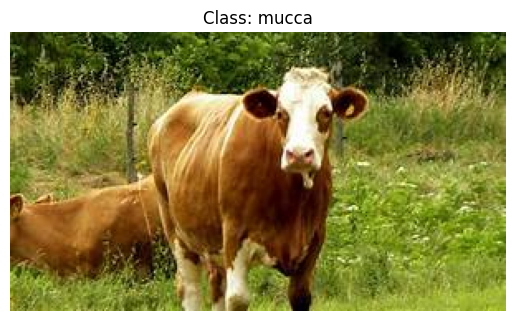

In [9]:
view_random_image(target_dir = r'C:\Users\ainao\Downloads\Animal Image Classification\split-data\train', target_class='mucca')

Preprocess DataSets

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

class_names = sorted(os.listdir(train_dir))  
class_names_tensor = tf.constant(class_names)

def process_image_with_label(file_path):
    # Extract folder name (label) from file path
    parts = tf.strings.split(file_path, os.sep)
    label_str = parts[-2]  # e.g., "cane"

    # Convert label string to integer index
    label = tf.argmax(tf.cast(tf.equal(class_names_tensor, label_str), tf.int32))

    # Read and preprocess image
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])
    img = img / 255.0  # Normalize to [0, 1]

    return img, label

def prepare_dataset(directory, batch_size=32):
    dataset = tf.data.Dataset.list_files(directory + '/*/*', shuffle=True)
    dataset = dataset.map(process_image_with_label, num_parallel_calls=AUTOTUNE)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(AUTOTUNE)
    return dataset

# Example directories (replace with your actual paths)
train_dir = r'C:/Users/ainao/Downloads/Animal Image Classification/split-data/train'
val_dir = r'C:/Users/ainao/Downloads/Animal Image Classification/split-data/val'
test_dir = r'C:/Users/ainao/Downloads/Animal Image Classification/split-data/test'

# Create datasets
train_ds = prepare_dataset(train_dir)
val_ds = prepare_dataset(val_dir)
test_ds = prepare_dataset(test_dir)


for images, labels in train_ds.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    print("First label (class index):", labels[0].numpy())
    print("Class name:", class_names[labels[0].numpy()])







Image batch shape: (32, 224, 224, 3)
Label batch shape: (32,)
First label (class index): 6
Class name: mucca


tf.Tensor(
[[[[0.63962    0.59648275 0.51020825]
   [0.62817675 0.5850395  0.49876496]
   [0.7003189  0.6571816  0.5709071 ]
   ...
   [0.5783273  0.5312685  0.43715084]
   [0.52196604 0.4749072  0.38078955]
   [0.4752277  0.4281689  0.33405125]]

  [[0.6167117  0.5735744  0.48729992]
   [0.6084204  0.5652831  0.47900864]
   [0.60804135 0.5649041  0.4786296 ]
   ...
   [0.56321746 0.51615864 0.42204103]
   [0.5120966  0.46503776 0.37092012]
   [0.46739316 0.42033434 0.3262167 ]]

  [[0.5930221  0.54988486 0.46361035]
   [0.6324206  0.58928335 0.50300884]
   [0.60176575 0.5586285  0.472354  ]
   ...
   [0.55555815 0.5084993  0.4143817 ]
   [0.50443727 0.45737848 0.3632608 ]
   [0.46616647 0.41910765 0.32499   ]]

  ...

  [[0.46020147 0.43667203 0.3896132 ]
   [0.3898338  0.3663044  0.31924558]
   [0.21275276 0.18922335 0.14216453]
   ...
   [0.05152521 0.04760364 0.0279958 ]
   [0.05671868 0.05279712 0.03318927]
   [0.06191204 0.05799047 0.03838263]]

  [[0.45125192 0.4277225  0.379342

In [12]:
train_ds, test_ds,val_ds

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

Create Modelling Callbacks

In [13]:
import tensorflow as tf
import datetime
from tf_keras.callbacks import TensorBoard


#Create a function to build a TensorBoard callback
def create_tensorboard_callback(log_dir="logs/fit", model_name="model"):
  #Create a log directory for storing TensorBoard logs
  logdir = os.path.join(r'C:\Users\ainao\Downloads\Animal Image Classification\split-data\logs',
                        #Make it so the logs get tracked whenever we run an experiment)
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return TensorBoard(logdir)


# Create ModelCheckpoint callback
checkpoint_path = "model_checkpoints/cp.ckpt" 
model_checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True) 

#Create early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)


# Creating learning rate reduction callback
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)


In [14]:
from tf_keras.layers import Conv2D, Dense , Flatten , MaxPool2D 
from tf_keras import layers,models, optimizers,losses,metrics
from tf_keras.models import Sequential


tf.random.set_seed(42)

Model_1 = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(224,224,3)),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(),
    Conv2D(64,3,activation='relu'),
    Conv2D(64,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])



Model_1.compile(loss='sparse_categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

In [15]:
History_1 = Model_1.fit(train_ds,
                        epochs=5,
                        steps_per_epoch=len(train_ds),
                        validation_data=val_ds,
                        validation_steps=int(0.15 * len(val_ds)),
                        callbacks = [create_tensorboard_callback('training_logs', 'model_1'),  # <-- call the function
                                                       model_checkpoint,
                                                       early_stopping,
                                                       reduce_lr])


Epoch 1/5


573/573 [==============================] - 1152s 2s/step - loss: 1.9913 - accuracy: 0.2929 - val_loss: 1.7204 - val_accuracy: 0.4097 - lr: 0.0010
Epoch 2/5
573/573 [==============================] - 1254s 2s/step - loss: 1.4926 - accuracy: 0.4933 - val_loss: 1.5018 - val_accuracy: 0.4861 - lr: 0.0010
Epoch 3/5
573/573 [==============================] - 1199s 2s/step - loss: 1.2163 - accuracy: 0.5890 - val_loss: 1.3328 - val_accuracy: 0.5521 - lr: 0.0010
Epoch 4/5
573/573 [==============================] - 1383s 2s/step - loss: 1.0055 - accuracy: 0.6627 - val_loss: 1.3939 - val_accuracy: 0.5538 - lr: 0.0010
Epoch 5/5
573/573 [==============================] - ETA: 0s - loss: 0.8383 - accuracy: 0.7224
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
573/573 [==============================] - 1537s 3s/step - loss: 0.8383 - accuracy: 0.7224 - val_loss: 1.4278 - val_accuracy: 0.5573 - lr: 0.0010


In [16]:
Model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 64)        0         
 g2D)                                                   

Feature Extraction Model

In [25]:
import tensorflow_hub as hub
# Create base model
input_shape = (224, 224, 3)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"


# Create Functional model 
inputs = layers.Input(shape=input_shape, name="input_layer")

feature_extractor = hub.KerasLayer(MODEL_URL, input_shape=(224, 224, 3), trainable=False, name='mobilenetv2_feature_extractor')

x = feature_extractor(inputs, training=False) # set base_model to inference mode only
outputs = layers.Dense(10, activation='softmax')(x) # want one output neuron per class 
# Separate activation of output layer so we can output float32 activations
model_2 = keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer= 'Adam',
              metrics=["accuracy"])

In [26]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

History_2 = model_2.fit(train_ds,
                        epochs=5,
                        steps_per_epoch=len(train_ds),
                        validation_data=val_ds,
                        validation_steps=int(0.15 * len(val_ds)),
                        callbacks = [create_tensorboard_callback('training_logs_2', 'model_2'),  # <-- call the function
                                                       model_checkpoint,
                                                       early_stopping,
                                                       reduce_lr])


Epoch 1/5
573/573 [==============================] - 253s 438ms/step - loss: 0.2515 - accuracy: 0.9319 - val_loss: 0.1490 - val_accuracy: 0.9549 - lr: 0.0010
Epoch 2/5
573/573 [==============================] - 248s 432ms/step - loss: 0.1097 - accuracy: 0.9670 - val_loss: 0.1326 - val_accuracy: 0.9635 - lr: 0.0010
Epoch 3/5
573/573 [==============================] - 262s 458ms/step - loss: 0.0850 - accuracy: 0.9753 - val_loss: 0.1680 - val_accuracy: 0.9306 - lr: 0.0010
Epoch 4/5
573/573 [==============================] - 301s 524ms/step - loss: 0.0682 - accuracy: 0.9816 - val_loss: 0.1127 - val_accuracy: 0.9722 - lr: 0.0010
Epoch 5/5
573/573 [==============================] - 260s 453ms/step - loss: 0.0577 - accuracy: 0.9846 - val_loss: 0.1156 - val_accuracy: 0.9635 - lr: 0.0010


Evaluate on Test Data

In [27]:
feature_vector_model = model_2.evaluate(test_ds)

123/123 [==============================] - 58s 473ms/step - loss: 0.1329 - accuracy: 0.9618


Save the Model

In [35]:
save_dir = 'best_model.h5'


loaded_model = keras.models.load_model(save_dir, custom_objects={'KerasLayer': hub.KerasLayer})



In [107]:
model_2.save('save_dir')

Load The Model

In [36]:
loaded_model.evaluate(test_ds)

123/123 [==============================] - 47s 381ms/step - loss: 0.1329 - accuracy: 0.9618


[0.13291843235492706, 0.9618417620658875]

In [37]:
loaded_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_feature_extrac  (None, 1280)              2257984   
 tor (KerasLayer)                                                
                                                                 
 dense_5 (Dense)             (None, 10)                12810     
                                                                 
Total params: 2270794 (8.66 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


Predict on Custom Image 

In [41]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [42]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [43]:
cane_corso = load_and_prep_image('Cane-Corso.jpg')
cane_corso

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6745098 , 0.8117647 , 0.9372549 ],
        [0.6784314 , 0.8156863 , 0.9411765 ],
        [0.6862745 , 0.8235294 , 0.9490196 ],
        ...,
        [0.65462166, 0.7957981 , 0.93697464],
        [0.64705884, 0.7882353 , 0.92941177],
        [0.6392157 , 0.78039217, 0.92156863]],

       [[0.6745098 , 0.8117647 , 0.9372549 ],
        [0.6784314 , 0.8156863 , 0.9411765 ],
        [0.6862745 , 0.8235294 , 0.9490196 ],
        ...,
        [0.65462166, 0.7957981 , 0.93697464],
        [0.64705884, 0.7882353 , 0.92941177],
        [0.6392157 , 0.78039217, 0.92156863]],

       [[0.6745098 , 0.8117647 , 0.9372549 ],
        [0.6784314 , 0.8156863 , 0.9411765 ],
        [0.6862745 , 0.8235294 , 0.9490196 ],
        ...,
        [0.65462166, 0.7957981 , 0.93697464],
        [0.64705884, 0.7882353 , 0.92941177],
        [0.6392157 , 0.78039217, 0.92156863]],

       ...,

       [[0.7722838 , 0.7285077 , 0.645674  ],
        [0.93

In [67]:
came_corso = tf.expand_dims(cane_corso, axis=0)


In [68]:
pred = model_2.predict(came_corso)

1/1 [==============================] - 0s 286ms/step


1/1 [==============================] - 0s 188ms/step


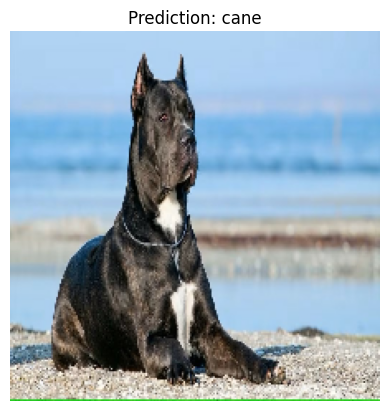

In [69]:
pred_and_plot(model_2, 'Cane-Corso.jpg', class_names)

Make Predictions on Test Dataset

In [70]:
test_dataset_pred = model_2.predict(test_ds)
test_dataset_pred

123/123 [==============================] - 48s 390ms/step


array([[7.4093068e-01, 1.5567853e-02, 9.3594277e-03, ..., 2.8864983e-02,
        7.8903919e-04, 3.0564715e-03],
       [3.3291999e-05, 9.9993956e-01, 1.3797892e-07, ..., 7.3177821e-06,
        4.9799255e-06, 1.7221373e-06],
       [7.2092321e-06, 1.4734917e-04, 9.9954504e-01, ..., 2.7309844e-04,
        4.0756722e-06, 2.4407711e-07],
       ...,
       [3.9667425e-06, 2.8747886e-06, 9.9998236e-01, ..., 3.5262537e-06,
        1.7216379e-06, 2.8729863e-07],
       [3.1749153e-06, 3.5906062e-08, 5.9924201e-07, ..., 8.3367155e-08,
        2.1376729e-06, 9.9999154e-01],
       [2.3939835e-03, 8.5810287e-05, 1.3136104e-04, ..., 1.0757033e-05,
        4.9281053e-02, 9.3017381e-01]], dtype=float32)

In [86]:
# Turn prediction probabilities into prediction classes
pred_classes = test_dataset_pred.argmax(axis=1)
pred_classes

array([0, 1, 2, ..., 2, 9, 9])

Unbatch Test Dataset

In [78]:
for images, labels in test_ds.take(1):
      print(images, labels)

tf.Tensor(
[[[[0.37580535 0.35227594 0.2895308 ]
   [0.37254903 0.34901962 0.28627452]
   [0.37254903 0.34901962 0.28627452]
   ...
   [0.6005953  0.5731443  0.46334037]
   [0.6096991  0.5822481  0.47244418]
   [0.6221988  0.59474784 0.48494396]]

  [[0.36593136 0.34240195 0.27965686]
   [0.36267507 0.33914563 0.27640054]
   [0.36267507 0.33914563 0.27640054]
   ...
   [0.597304   0.569853   0.46004906]
   [0.6064078  0.57895684 0.46915287]
   [0.6189076  0.5914566  0.48165262]]

  [[0.35591424 0.33238482 0.26963973]
   [0.35358083 0.3300514  0.2673063 ]
   [0.35217088 0.32864147 0.26589638]
   ...
   [0.59136724 0.56391627 0.45411232]
   [0.6014964  0.5740454  0.46424147]
   [0.614919   0.587468   0.47766414]]

  ...

  [[0.3045518  0.26533613 0.16729692]
   [0.29803923 0.2548319  0.1587885 ]
   [0.3022565  0.25519767 0.16108003]
   ...
   [0.39922965 0.34824926 0.22275905]
   [0.3973038  0.35017508 0.22853656]
   [0.39856437 0.35542712 0.23778005]]

  [[0.30518204 0.26596636 0.167927

In [84]:
# Unbatch the dataset first
unbatched_ds = test_ds.unbatch()

# Extract all labels
y_labels = [label.numpy() for _, label in unbatched_ds]
y_labels = np.array(y_labels)
len(y_labels)

3931

Evaluate Model Predictions

In [87]:
import numpy as np

y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model_2.predict(images)
    pred_classes = np.argmax(preds, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(pred_classes)

# Convert to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Accuracy
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", sklearn_accuracy)


1/1 [==============================] - 0s 429ms/step
Accuracy: 0.9618417705418468


In [82]:

# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

Plot Confusion Matrix

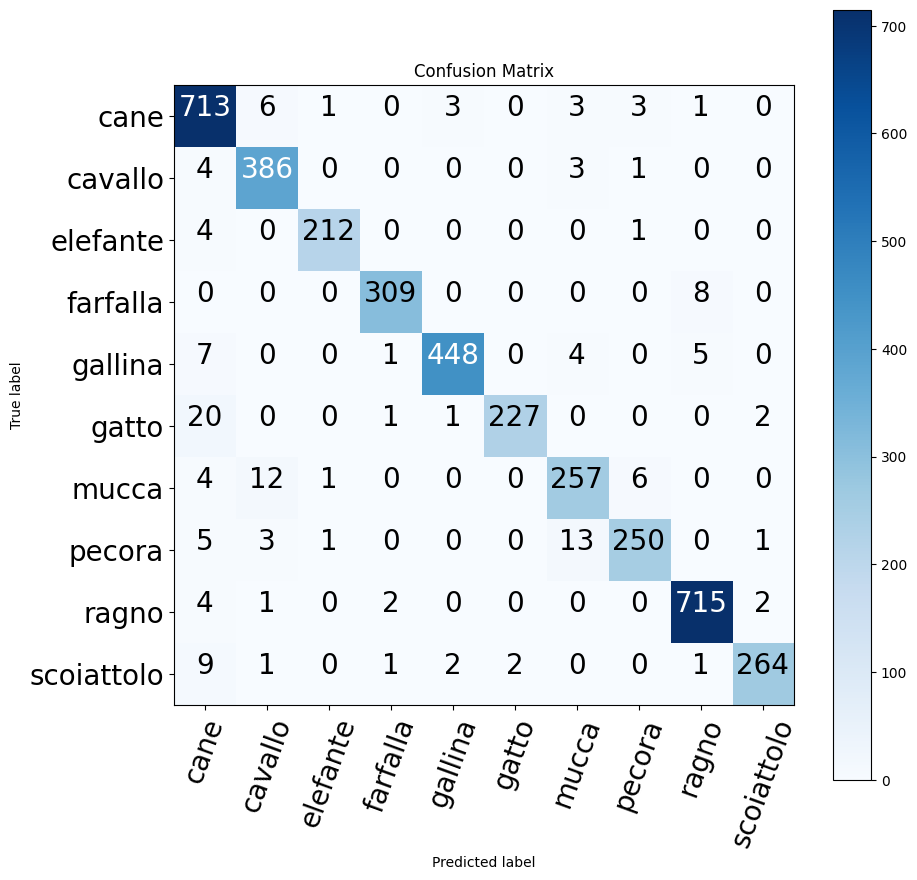

In [103]:
# Plot a confusion matrix with all 25250 predictions, ground truth labels and 101 classes
make_confusion_matrix(y_true=y_true,
                      y_pred=y_pred,
                      classes=class_names,
                      figsize=(10,10),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       730
           1       0.94      0.98      0.96       394
           2       0.99      0.98      0.98       217
           3       0.98      0.97      0.98       317
           4       0.99      0.96      0.97       465
           5       0.99      0.90      0.95       251
           6       0.92      0.92      0.92       280
           7       0.96      0.92      0.94       273
           8       0.98      0.99      0.98       724
           9       0.98      0.94      0.96       280

    accuracy                           0.96      3931
   macro avg       0.97      0.95      0.96      3931
weighted avg       0.96      0.96      0.96      3931



In [95]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_true, y_pred, output_dict=True)
classification_report_dict
     

{'0': {'precision': 0.925974025974026,
  'recall': 0.9767123287671233,
  'f1-score': 0.9506666666666667,
  'support': 730.0},
 '1': {'precision': 0.9437652811735942,
  'recall': 0.9796954314720813,
  'f1-score': 0.9613947696139477,
  'support': 394.0},
 '2': {'precision': 0.986046511627907,
  'recall': 0.9769585253456221,
  'f1-score': 0.9814814814814815,
  'support': 217.0},
 '3': {'precision': 0.9840764331210191,
  'recall': 0.9747634069400631,
  'f1-score': 0.9793977812995246,
  'support': 317.0},
 '4': {'precision': 0.986784140969163,
  'recall': 0.9634408602150538,
  'f1-score': 0.9749727965179543,
  'support': 465.0},
 '5': {'precision': 0.9912663755458515,
  'recall': 0.9043824701195219,
  'f1-score': 0.9458333333333333,
  'support': 251.0},
 '6': {'precision': 0.9178571428571428,
  'recall': 0.9178571428571428,
  'f1-score': 0.9178571428571428,
  'support': 280.0},
 '7': {'precision': 0.9578544061302682,
  'recall': 0.9157509157509157,
  'f1-score': 0.9363295880149812,
  'suppo

In [104]:
from sklearn.metrics import classification_report

# Example usage
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Create dictionary of F1-scores per class
class_f1_scores = {}
for k, v in report.items():
    if k == "accuracy":
        break
    else:
        class_f1_scores[k] = v["f1-score"]


In [105]:
import pandas as pd

F1_score = pd.DataFrame.from_dict(class_f1_scores, orient='index', columns=['F1 Score'])
F1_score.index.name = 'Class'
F1_score.reset_index(inplace=True)

print(F1_score)


        Class  F1 Score
0        cane  0.950667
1     cavallo  0.961395
2    elefante  0.981481
3    farfalla  0.979398
4     gallina  0.974973
5       gatto  0.945833
6       mucca  0.917857
7      pecora  0.936330
8       ragno  0.983494
9  scoiattolo  0.961749
